# Wine dataset by ANN, tensorflow.keras

In [1]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기
from sklearn import datasets
raw_wine = datasets.load_wine()

In [3]:
# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [4]:
# 피쳐 데이터 차원 확인
print(X.shape)

(178, 13)


In [5]:
# 타겟 데이터 종류 확인
print(set(y))

{0, 1, 2}


In [6]:
# 타겟 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y) 
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [7]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot, 
                                        random_state=0)

In [8]:
# 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

n_feat = X_tn.shape[1]
n_class = len(set(y))
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

In [9]:
# 신경망 모형 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________________


In [9]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [10]:
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
27/27 [==============================] - 1s 2ms/step - loss: 1.9798 - accuracy: 0.3459
Epoch 2/30
27/27 [==============================] - 0s 2ms/step - loss: 1.6155 - accuracy: 0.3835
Epoch 3/30
27/27 [==============================] - 0s 2ms/step - loss: 1.2918 - accuracy: 0.3985
Epoch 4/30
27/27 [==============================] - 0s 3ms/step - loss: 1.0279 - accuracy: 0.4436
Epoch 5/30
27/27 [==============================] - 0s 2ms/step - loss: 0.9092 - accuracy: 0.5263
Epoch 6/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8728 - accuracy: 0.6015
Epoch 7/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8734 - accuracy: 0.5639
Epoch 8/30
27/27 [==============================] - 0s 2ms/step - loss: 0.7951 - accuracy: 0.6241
Epoch 9/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8200 - accuracy: 0.5940
Epoch 10/30
27/27 [==============================] - 0s 4ms/step - loss: 0.7862 - accuracy: 0.6165: 0s - loss: 0.7867 

In [12]:
# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

5/5 [==============================] - 0s 4ms/step - loss: 0.9379 - accuracy: 0.5789
0.5789473652839661


In [13]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.9154 - accuracy: 0.6444
0.644444465637207


In [14]:
import numpy as np
epoch = np.arange(1,epo+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [15]:
accuracy = hist.history['accuracy'] 
print(accuracy)

[0.3458646535873413, 0.3834586441516876, 0.39849624037742615, 0.4436090290546417, 0.5263158082962036, 0.6015037298202515, 0.5639097690582275, 0.6240601539611816, 0.5939849615097046, 0.61654132604599, 0.6616541147232056, 0.6842105388641357, 0.6842105388641357, 0.6992481350898743, 0.7142857313156128, 0.7744361162185669, 0.7518796920776367, 0.7518796920776367, 0.7443609237670898, 0.7894737124443054, 0.7969924807548523, 0.7669172883033752, 0.8421052694320679, 0.8345864415168762, 0.8270676732063293, 0.8195488452911377, 0.8571428656578064, 0.8195488452911377, 0.8571428656578064, 0.8571428656578064]


In [16]:
loss = hist.history['loss'] 
print(loss)

[1.9797742366790771, 1.6155288219451904, 1.2918165922164917, 1.0279443264007568, 0.9091541171073914, 0.8727607131004333, 0.8733514547348022, 0.7951135635375977, 0.8200013041496277, 0.7861714959144592, 0.7411353588104248, 0.7207063436508179, 0.7283971905708313, 0.7208575010299683, 0.6616654992103577, 0.6384326815605164, 0.6166559457778931, 0.6317903995513916, 0.7049684524536133, 0.5677063465118408, 0.5816744565963745, 0.5671247243881226, 0.4888368248939514, 0.5791000723838806, 0.5098254680633545, 0.476428359746933, 0.42427700757980347, 0.46958184242248535, 0.45588818192481995, 0.45778656005859375]


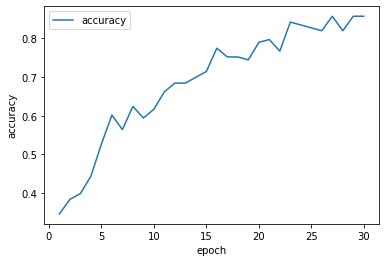

In [17]:
# 정확도 학습 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

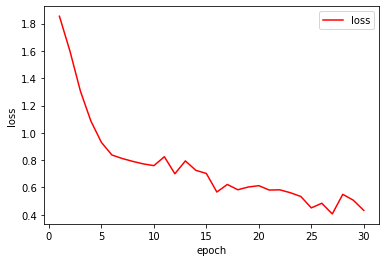

In [18]:
# 손실 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, loss,'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# XOR problem by tensorflow.keras

(4, 2)
1
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_49 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 11        
_________________________________________________________________
activation_50 (Activation)   (None, 1)                 0         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
[[1 0]
 [0 1]
 [0 0]
 [1 1]] [[1]
 [1]
 [0]
 [0]]
Epoch 1/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.7500
Epoch 2/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.7035 - accuracy: 0.5000


2/2 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.7500
Epoch 157/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.6835 - accuracy: 0.7500
Epoch 158/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.6862 - accuracy: 0.7500
Epoch 159/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.7500
Epoch 160/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.6832 - accuracy: 0.7500
Epoch 161/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.6858 - accuracy: 0.7500
Epoch 162/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.6857 - accuracy: 0.5000
Epoch 163/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.6827 - accuracy: 0.7500
Epoch 164/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.6827 - accuracy: 0.7500
Epoch 165/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.6854 - accuracy: 0.5000
Epoch 166/30

2/2 [==============================] - 0s 4ms/step - loss: 0.6684 - accuracy: 0.7500
Epoch 318/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.6683 - accuracy: 0.7500
Epoch 319/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.6654 - accuracy: 0.7500
Epoch 320/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.7500
Epoch 321/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.6650 - accuracy: 0.7500
Epoch 322/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.6678 - accuracy: 0.7500
Epoch 323/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.6647 - accuracy: 0.7500
Epoch 324/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.6646 - accuracy: 0.7500
Epoch 325/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6674 - accuracy: 0.7500
Epoch 326/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.6645 - accuracy: 0.7500
Epoch 327/300

2/2 [==============================] - 0s 6ms/step - loss: 0.6427 - accuracy: 1.0000
Epoch 480/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 1.0000
Epoch 481/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.6426 - accuracy: 1.0000
Epoch 482/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6422 - accuracy: 1.0000
Epoch 483/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6451 - accuracy: 1.0000
Epoch 484/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6449 - accuracy: 1.0000
Epoch 485/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.6417 - accuracy: 1.0000
Epoch 486/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.6417 - accuracy: 1.0000
Epoch 487/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6416 - accuracy: 1.0000
Epoch 488/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.6412 - accuracy: 1.0000
Epoch 489/300

Epoch 560/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.6285 - accuracy: 1.0000
Epoch 561/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.6286 - accuracy: 1.0000
Epoch 562/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6312 - accuracy: 1.0000
Epoch 563/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.6310 - accuracy: 1.0000
Epoch 564/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6280 - accuracy: 1.0000
Epoch 565/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6278 - accuracy: 1.0000
Epoch 566/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.6274 - accuracy: 1.0000
Epoch 567/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6303 - accuracy: 1.0000
Epoch 568/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.6270 - accuracy: 1.0000
Epoch 569/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6270 - accuracy: 1.000

2/2 [==============================] - 0s 32ms/step - loss: 0.5936 - accuracy: 1.0000
Epoch 722/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.5936 - accuracy: 1.0000
Epoch 723/3000
2/2 [==============================] - 0s 85ms/step - loss: 0.5933 - accuracy: 1.0000 0s - loss: 0.5933 - accuracy: 1.00
Epoch 724/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.5960 - accuracy: 1.0000
Epoch 725/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.5926 - accuracy: 1.0000
Epoch 726/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.5924 - accuracy: 1.0000
Epoch 727/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.5924 - accuracy: 1.0000
Epoch 728/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.5950 - accuracy: 1.0000
Epoch 729/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.5947 - accuracy: 1.0000
Epoch 730/3000
2/2 [==============================] - 0s 11ms/step - loss: 0

2/2 [==============================] - 0s 4ms/step - loss: 0.5487 - accuracy: 1.0000
Epoch 883/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.5484 - accuracy: 1.0000
Epoch 884/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.5481 - accuracy: 1.0000
Epoch 885/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.5478 - accuracy: 1.0000
Epoch 886/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.5477 - accuracy: 1.0000
Epoch 887/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.5474 - accuracy: 1.0000
Epoch 888/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.5471 - accuracy: 1.0000
Epoch 889/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.5468 - accuracy: 1.0000
Epoch 890/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.5492 - accuracy: 1.0000
Epoch 891/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.5489 - accuracy: 1.0000
Epoch 892/3

2/2 [==============================] - 0s 15ms/step - loss: 0.4969 - accuracy: 1.0000
Epoch 1045/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.4940 - accuracy: 1.0000
Epoch 1046/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.4962 - accuracy: 1.0000
Epoch 1047/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.4933 - accuracy: 1.0000
Epoch 1048/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.4954 - accuracy: 1.0000
Epoch 1049/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.4925 - accuracy: 1.0000
Epoch 1050/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.4920 - accuracy: 1.0000
Epoch 1051/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.4943 - accuracy: 1.0000
Epoch 1052/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.4940 - accuracy: 1.0000
Epoch 1053/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.4909 - accuracy: 1.0000
E

Epoch 1125/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.4644 - accuracy: 1.0000
Epoch 1126/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 1.0000
Epoch 1127/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.4636 - accuracy: 1.0000
Epoch 1128/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.4632 - accuracy: 1.0000
Epoch 1129/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.4652 - accuracy: 1.0000
Epoch 1130/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 1.0000
Epoch 1131/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 1.0000
Epoch 1132/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.4641 - accuracy: 1.0000
Epoch 1133/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.4637 - accuracy: 1.0000
Epoch 1134/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.4610 - accura

2/2 [==============================] - 0s 6ms/step - loss: 0.4049 - accuracy: 1.0000
Epoch 1286/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.4046 - accuracy: 1.0000
Epoch 1287/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.4022 - accuracy: 1.0000
Epoch 1288/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.4016 - accuracy: 1.0000
Epoch 1289/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.4012 - accuracy: 1.0000
Epoch 1290/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.4010 - accuracy: 1.0000
Epoch 1291/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.4026 - accuracy: 1.0000
Epoch 1292/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.4022 - accuracy: 1.0000
Epoch 1293/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.3999 - accuracy: 1.0000
Epoch 1294/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.4015 - accuracy: 1.0000
Epo

2/2 [==============================] - 0s 6ms/step - loss: 0.3426 - accuracy: 1.0000
Epoch 1447/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.3421 - accuracy: 1.0000
Epoch 1448/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.3435 - accuracy: 1.0000
Epoch 1449/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.3414 - accuracy: 1.0000
Epoch 1450/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.3428 - accuracy: 1.0000
Epoch 1451/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.3424 - accuracy: 1.0000
Epoch 1452/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.3405 - accuracy: 1.0000
Epoch 1453/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.3400 - accuracy: 1.0000
Epoch 1454/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.3413 - accuracy: 1.0000
Epoch 1455/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.3394 - accuracy: 1.0000
Epoc

2/2 [==============================] - 0s 6ms/step - loss: 0.3157 - accuracy: 1.0000
Epoch 1528/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.3138 - accuracy: 1.0000
Epoch 1529/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 1.0000
Epoch 1530/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.3131 - accuracy: 1.0000
Epoch 1531/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.3143 - accuracy: 1.0000
Epoch 1532/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.3125 - accuracy: 1.0000
Epoch 1533/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.3121 - accuracy: 1.0000
Epoch 1534/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.3133 - accuracy: 1.0000
Epoch 1535/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.3114 - accuracy: 1.0000
Epoch 1536/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.3111 - accuracy: 1.0000
Epoc

Epoch 1688/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.2635 - accuracy: 1.0000
Epoch 1689/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.2644 - accuracy: 1.0000
Epoch 1690/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.2641 - accuracy: 1.0000
Epoch 1691/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.2638 - accuracy: 1.0000
Epoch 1692/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.2635 - accuracy: 1.0000
Epoch 1693/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.2633 - accuracy: 1.0000
Epoch 1694/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.2618 - accuracy: 1.0000
Epoch 1695/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.2616 - accuracy: 1.0000
Epoch 1696/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.2612 - accuracy: 1.0000
Epoch 1697/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.2621 - acc

Epoch 1849/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.2213 - accuracy: 1.0000
Epoch 1850/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 1.0000
Epoch 1851/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.2216 - accuracy: 1.0000
Epoch 1852/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.2206 - accuracy: 1.0000
Epoch 1853/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.2203 - accuracy: 1.0000
Epoch 1854/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.2209 - accuracy: 1.0000
Epoch 1855/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.2198 - accuracy: 1.0000
Epoch 1856/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.2197 - accuracy: 1.0000
Epoch 1857/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.2202 - accuracy: 1.0000
Epoch 1858/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.2200 - accura

2/2 [==============================] - 0s 9ms/step - loss: 0.1870 - accuracy: 1.0000
Epoch 2010/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.1869 - accuracy: 1.0000
Epoch 2011/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.1867 - accuracy: 1.0000
Epoch 2012/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.1871 - accuracy: 1.0000
Epoch 2013/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1869 - accuracy: 1.0000
Epoch 2014/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1861 - accuracy: 1.0000
Epoch 2015/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1860 - accuracy: 1.0000
Epoch 2016/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1858 - accuracy: 1.0000
Epoch 2017/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1855 - accuracy: 1.0000
Epoch 2018/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1860 - accuracy: 1.0000
Epoc

2/2 [==============================] - 0s 3ms/step - loss: 0.1729 - accuracy: 1.0000
Epoch 2091/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1728 - accuracy: 1.0000
Epoch 2092/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.1721 - accuracy: 1.0000
Epoch 2093/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1719 - accuracy: 1.0000
Epoch 2094/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.1717 - accuracy: 1.0000
Epoch 2095/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.1715 - accuracy: 1.0000
Epoch 2096/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.1714 - accuracy: 1.0000
Epoch 2097/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.1712 - accuracy: 1.0000
Epoch 2098/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.1711 - accuracy: 1.0000
Epoch 2099/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1709 - accuracy: 1.0000
E

2/2 [==============================] - 0s 4ms/step - loss: 0.1597 - accuracy: 1.0000
Epoch 2172/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1591 - accuracy: 1.0000
Epoch 2173/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1589 - accuracy: 1.0000
Epoch 2174/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.1593 - accuracy: 1.0000
Epoch 2175/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.1591 - accuracy: 1.0000
Epoch 2176/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.1585 - accuracy: 1.0000
Epoch 2177/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.1588 - accuracy: 1.0000
Epoch 2178/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.1582 - accuracy: 1.0000
Epoch 2179/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.1581 - accuracy: 1.0000
Epoch 2180/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.1579 - accuracy: 1.0000


Epoch 2252/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1475 - accuracy: 1.0000
Epoch 2253/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1478 - accuracy: 1.0000
Epoch 2254/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.1477 - accuracy: 1.0000
Epoch 2255/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.1475 - accuracy: 1.0000
Epoch 2256/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.1470 - accuracy: 1.0000
Epoch 2257/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.1469 - accuracy: 1.0000
Epoch 2258/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.1467 - accuracy: 1.0000
Epoch 2259/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.1466 - accuracy: 1.0000
Epoch 2260/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.1464 - accuracy: 1.0000
Epoch 2261/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1463 - accu

Epoch 2413/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 1.0000
Epoch 2414/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1276 - accuracy: 1.0000
Epoch 2415/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1275 - accuracy: 1.0000
Epoch 2416/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1277 - accuracy: 1.0000
Epoch 2417/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1272 - accuracy: 1.0000
Epoch 2418/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.1271 - accuracy: 1.0000
Epoch 2419/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.1274 - accuracy: 1.0000
Epoch 2420/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.1273 - accuracy: 1.0000
Epoch 2421/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1268 - accuracy: 1.0000
Epoch 2422/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.1270 - accur

2/2 [==============================] - 0s 12ms/step - loss: 0.1117 - accuracy: 1.0000
Epoch 2575/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.1116 - accuracy: 1.0000
Epoch 2576/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.1115 - accuracy: 1.0000
Epoch 2577/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1114 - accuracy: 1.0000
Epoch 2578/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.1116 - accuracy: 1.0000
Epoch 2579/3000
2/2 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 1.0000
Epoch 2580/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1114 - accuracy: 1.0000
Epoch 2581/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.1111 - accuracy: 1.0000
Epoch 2582/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.1112 - accuracy: 1.0000
Epoch 2583/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1111 - accuracy: 1.0000
E

2/2 [==============================] - 0s 9ms/step - loss: 0.0987 - accuracy: 1.0000
Epoch 2735/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0986 - accuracy: 1.0000
Epoch 2736/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.0988 - accuracy: 1.0000
Epoch 2737/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.0987 - accuracy: 1.0000
Epoch 2738/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.0984 - accuracy: 1.0000
Epoch 2739/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.0985 - accuracy: 1.0000
Epoch 2740/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0985 - accuracy: 1.0000
Epoch 2741/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0984 - accuracy: 1.0000
Epoch 2742/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0983 - accuracy: 1.0000
Epoch 2743/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0980 - accuracy: 1.0000
Epoc

Epoch 2896/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.0879 - accuracy: 1.0000
Epoch 2897/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0880 - accuracy: 1.0000
Epoch 2898/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0879 - accuracy: 1.0000
Epoch 2899/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0879 - accuracy: 1.0000
Epoch 2900/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0876 - accuracy: 1.0000
Epoch 2901/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0876 - accuracy: 1.0000
Epoch 2902/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0875 - accuracy: 1.0000
Epoch 2903/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0875 - accuracy: 1.0000
Epoch 2904/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.0874 - accuracy: 1.0000
Epoch 2905/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0873 -

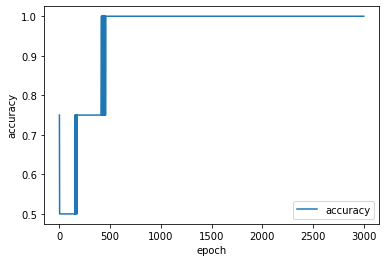

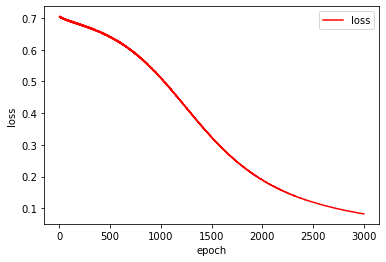

In [33]:
from sklearn import datasets
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

import matplotlib.pyplot as plt

# 랜덤 시드 설정
np.random.seed(10)
tf.random.set_seed(10)

# 데이터 불러오기
#raw_wine = datasets.load_wine()

# 피쳐, 타겟 데이터 지정
#X = raw_wine.data
#y = raw_wine.target

#X_tn = np.array([[1, 0, 1], [0, 1, 1], [0, 0, 1], [1, 1, 1]])

X_tn = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])

y_tn = np.array([[1], [1], [0], [0]])

# 피쳐 데이터 차원 확인
print(X_tn.shape)

# 타겟 데이터 종류 확인
#print(set(y))

# 타겟 데이터 원-핫 인코딩
#y_tn = to_categorical(y_tn) 
#print(y_tn)
# 트레이닝/테스트 데이터 분할
#X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot, random_state=0)

# 신경망 생성
n_feat = X_tn.shape[1]
#print(n_feat)
#n_class = len(set(y_tn))
n_class = y_tn.shape[1]
print(n_class)

epo = 3000

model = Sequential()
model.add(Dense(10, input_dim=n_feat))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(Activation('sigmoid'))
model.add(Activation('tanh'))
model.add(Dense(n_class))
model.add(Activation('sigmoid'))
#model.add(Activation('softmax'))
#model.add(Activation('linear'))

##########################
#model = Sequential()
#model.add(Dense(8, input_dim=2))
#model.add(Activation('tanh'))
#model.add(Dense(1))
#model.add(Activation('sigmoid'))
##########################



# 신경망 모형 구조 확인
model.summary()

# 모형 컴파일
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(X_tn,y_tn)
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=2)

# 트레이닝 데이터 평가
#print(model.evaluate(X_tn, y_tn)[1])

print(model.predict(X_tn))


epoch = np.arange(1,epo+1)
accuracy = hist.history['accuracy'] 
loss = hist.history['loss'] 

# 정확도 학습 그래프
plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(epoch, loss,'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## XOR problem by tensorflow

In [48]:
import tensorflow as tf
import numpy as np

import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior() 
#출처: https://gmnam.tistory.com/159 [Voyager]
 
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
y_data = np.array([[0],   [1],   [1],   [0]], dtype=np.float32)
 
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
 
# W = tf.Variable(tf.random_normal([2,1]), name = "weight")
# b = tf.Variable(tf.random_normal([1]), name = "bias")
# hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
 
W1 = tf.Variable(tf.random_normal([2,2]), name="weight1")
b1 = tf.Variable(tf.random_normal([2]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
 
W2 = tf.Variable(tf.random_normal([2,1]), name="weight2")
b2 = tf.Variable(tf.random_normal([1]), name="bias2")
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
 
# cost function / minimize cost
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
 
# predicate / accuracy
predicated = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicated, Y), dtype=tf.float32))
 
#
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step%1000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
    h, c, a = sess.run([hypothesis, predicated, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ",h,"\nCorrect: ",c,"\nAccuracy: ",a)
 


#출처: https://doorbw.tistory.com/141 [Tigercow.Door]

Instructions for updating:
non-resource variables are not supported in the long term
0 0.88537306 [array([[-0.62952864,  0.53815866],
       [-2.451361  ,  0.7069043 ]], dtype=float32), array([[0.76574844],
       [0.37003666]], dtype=float32)]
1000 0.6851754 [array([[-0.7253963 ,  0.53367996],
       [-2.464178  ,  0.69661933]], dtype=float32), array([[-0.5400696 ],
       [ 0.08571559]], dtype=float32)]
2000 0.5971708 [array([[-2.602232  ,  0.5619641 ],
       [-3.1174476 ,  0.70800245]], dtype=float32), array([[-2.533962  ],
       [-0.07618555]], dtype=float32)]
3000 0.4937649 [array([[-4.204423 ,  0.7919068],
       [-4.3355837,  0.9719784]], dtype=float32), array([[-4.3147225],
       [-1.1771399]], dtype=float32)]
4000 0.26080942 [array([[-5.1340938,  2.123573 ],
       [-5.2045603,  2.1434216]], dtype=float32), array([[-5.7433133],
       [-4.037129 ]], dtype=float32)]
5000 0.09773086 [array([[-5.661454 ,  3.2814946],
       [-5.7041836,  3.2860622]], dtype=float32), array([[-7

# XOR problem by Keras

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
import numpy as np 

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1)
#model.compile(loss='binary_crossentropy', optimizer=sgd)
model.compile(loss='MSE', optimizer=sgd)


#model.fit(X, y, show_accuracy=True, batch_size=1, nb_epoch=1000)

model.fit(X, y, batch_size=1, epochs=1000)

print(model.predict(X))

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2743
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2732
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2721
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2707
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2702
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2693
Epoch 7/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2690
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2683
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2676
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2670
Epoch 11/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2666
Epoch 12/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2660
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 0s 7ms/step - loss: 0.2474
Epoch 104/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2472
Epoch 105/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2470
Epoch 106/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2466
Epoch 107/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2464
Epoch 108/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2463
Epoch 109/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2459
Epoch 110/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2457
Epoch 111/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2455
Epoch 112/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2453
Epoch 113/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2451
Epoch 114/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2447
Epoch 115/1000
4/4 [======================

Epoch 204/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1848
Epoch 205/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1833
Epoch 206/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1823
Epoch 207/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1808
Epoch 208/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1797
Epoch 209/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1781
Epoch 210/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1769
Epoch 211/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1754
Epoch 212/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1741
Epoch 213/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1728
Epoch 214/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1715
Epoch 215/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1701
Epoch 216/1000
4/4 [========

4/4 [==============================] - 0s 5ms/step - loss: 0.0539
Epoch 305/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 306/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0524
Epoch 307/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0517
Epoch 308/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0510
Epoch 309/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0504
Epoch 310/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0497
Epoch 311/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0491
Epoch 312/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 313/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0478
Epoch 314/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 315/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 316/1000
4/4 [======================

Epoch 405/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 406/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0189
Epoch 407/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0188
Epoch 408/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0186
Epoch 409/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0185
Epoch 410/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0184
Epoch 411/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182
Epoch 412/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0181
Epoch 413/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0180
Epoch 414/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0178
Epoch 415/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 416/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 417/1000
4/4 [=======

4/4 [==============================] - 0s 7ms/step - loss: 0.0103
Epoch 507/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 508/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0102
Epoch 509/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 510/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 511/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 512/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 513/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 514/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 515/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0099
Epoch 516/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 517/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 518/1000
4/4 [======================

4/4 [==============================] - 0s 8ms/step - loss: 0.0068
Epoch 608/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 609/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0068
Epoch 610/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0068
Epoch 611/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0067
Epoch 612/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0067
Epoch 613/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 614/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0067
Epoch 615/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0066
Epoch 616/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 617/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 618/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 619/1000
4/4 [======================

4/4 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 708/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 709/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 710/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 711/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 712/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 713/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 714/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 715/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0049
Epoch 716/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 717/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0049
Epoch 718/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 719/1000
4/4 [=====================

Epoch 808/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 809/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 810/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 811/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 812/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 813/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 814/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 815/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 816/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 817/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 818/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 819/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 820/1000
4/4 [=======

Epoch 909/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 910/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 911/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 912/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 913/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 914/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 915/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 916/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 917/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 918/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 919/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 920/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 921/1000
4/4 [========

## Momentum method

In [5]:
# keras version

import numpy
import tensorflow as tf

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
var = tf.Variable(1.0)
val0 = var.value()
loss = lambda: (var ** 2)/2.0         # d(loss)/d(var1) = var1

# First step is `- learning_rate * grad`
step_count = opt.minimize(loss, [var]).numpy()
#print(var.numpy())
val1 = var.value()
print((val0 - val1).numpy())

step_count = opt.minimize(loss, [var]).numpy()
#print(var.numpy())
val2 = var.value()
print((val1 - val2).numpy())



0.100000024
0.089999974


In [6]:
import numpy
import tensorflow as tf

opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
var = tf.Variable(1.0)
val0 = var.value()
loss = lambda: (var ** 2)/2.0         # d(loss)/d(var1) = var1

# First step is `- learning_rate * grad`
step_count = opt.minimize(loss, [var]).numpy()
#print(var.numpy())
val1 = var.value()
print((val0 - val1).numpy())

# On later steps, step-size increases because of momentum
step_count = opt.minimize(loss, [var]).numpy()
#print(var.numpy())
val2 = var.value()
print((val1 - val2).numpy())


0.100000024
0.18


In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
import numpy as np 

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1,momentum=0.9)
#model.compile(loss='binary_crossentropy', optimizer=sgd)
model.compile(loss='MSE', optimizer=sgd)


#model.fit(X, y, show_accuracy=True, batch_size=1, nb_epoch=1000)

model.fit(X, y, batch_size=1, epochs=1000)

print(model.predict(X))

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2699
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2975
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2634
Epoch 4/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2892
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2623
Epoch 6/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2572
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2524
Epoch 8/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2856
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2551
Epoch 10/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2621
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2375
Epoch 12/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2389
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 103/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 104/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 105/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 106/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 107/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 108/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 109/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 110/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 111/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 112/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 113/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 114/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 9.2192e-04
Epoch 203/1000
4/4 [==============================] - 0s 5ms/step - loss: 9.1626e-04
Epoch 204/1000
4/4 [==============================] - 0s 3ms/step - loss: 9.1075e-04
Epoch 205/1000
4/4 [==============================] - 0s 4ms/step - loss: 9.0628e-04
Epoch 206/1000
4/4 [==============================] - 0s 4ms/step - loss: 9.0039e-04
Epoch 207/1000
4/4 [==============================] - 0s 11ms/step - loss: 8.9520e-04
Epoch 208/1000
4/4 [==============================] - 0s 8ms/step - loss: 8.8981e-04
Epoch 209/1000
4/4 [==============================] - 0s 7ms/step - loss: 8.8522e-04
Epoch 210/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.8009e-04
Epoch 211/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.7494e-04
Epoch 212/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.7009e-04
Epoch 213/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.649

Epoch 298/1000
4/4 [==============================] - 0s 4ms/step - loss: 5.8207e-04
Epoch 299/1000
4/4 [==============================] - 0s 7ms/step - loss: 5.8033e-04
Epoch 300/1000
4/4 [==============================] - 0s 11ms/step - loss: 5.7848e-04
Epoch 301/1000
4/4 [==============================] - 0s 7ms/step - loss: 5.7546e-04
Epoch 302/1000
4/4 [==============================] - 0s 7ms/step - loss: 5.7353e-04
Epoch 303/1000
4/4 [==============================] - 0s 10ms/step - loss: 5.7104e-04
Epoch 304/1000
4/4 [==============================] - 0s 5ms/step - loss: 5.6922e-04
Epoch 305/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.6690e-04
Epoch 306/1000
4/4 [==============================] - 0s 4ms/step - loss: 5.6460e-04
Epoch 307/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.6240e-04
Epoch 308/1000
4/4 [==============================] - 0s 4ms/step - loss: 5.6107e-04
Epoch 309/1000
4/4 [==============================] - 0s 8ms/st

4/4 [==============================] - 0s 5ms/step - loss: 4.2292e-04
Epoch 395/1000
4/4 [==============================] - 0s 3ms/step - loss: 4.2154e-04
Epoch 396/1000
4/4 [==============================] - 0s 4ms/step - loss: 4.2090e-04
Epoch 397/1000
4/4 [==============================] - 0s 4ms/step - loss: 4.1934e-04
Epoch 398/1000
4/4 [==============================] - 0s 5ms/step - loss: 4.1801e-04
Epoch 399/1000
4/4 [==============================] - 0s 7ms/step - loss: 4.1691e-04
Epoch 400/1000
4/4 [==============================] - 0s 6ms/step - loss: 4.1587e-04
Epoch 401/1000
4/4 [==============================] - 0s 8ms/step - loss: 4.1490e-04
Epoch 402/1000
4/4 [==============================] - 0s 5ms/step - loss: 4.1327e-04
Epoch 403/1000
4/4 [==============================] - 0s 5ms/step - loss: 4.1219e-04
Epoch 404/1000
4/4 [==============================] - 0s 7ms/step - loss: 4.1115e-04
Epoch 405/1000
4/4 [==============================] - 0s 5ms/step - loss: 4.0983

4/4 [==============================] - 0s 3ms/step - loss: 3.3118e-04
Epoch 491/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.3049e-04
Epoch 492/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.2971e-04
Epoch 493/1000
4/4 [==============================] - 0s 5ms/step - loss: 3.2891e-04
Epoch 494/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.2806e-04
Epoch 495/1000
4/4 [==============================] - 0s 10ms/step - loss: 3.2751e-04
Epoch 496/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.2661e-04
Epoch 497/1000
4/4 [==============================] - 0s 8ms/step - loss: 3.2597e-04
Epoch 498/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.2519e-04
Epoch 499/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.2449e-04
Epoch 500/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.2378e-04
Epoch 501/1000
4/4 [==============================] - 0s 6ms/step - loss: 3.229

4/4 [==============================] - 0s 3ms/step - loss: 2.7160e-04
Epoch 587/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.7096e-04
Epoch 588/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.7050e-04
Epoch 589/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.7011e-04
Epoch 590/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.6954e-04
Epoch 591/1000
4/4 [==============================] - 0s 7ms/step - loss: 2.6899e-04
Epoch 592/1000
4/4 [==============================] - 0s 14ms/step - loss: 2.6838e-04
Epoch 593/1000
4/4 [==============================] - 0s 7ms/step - loss: 2.6792e-04
Epoch 594/1000
4/4 [==============================] - 0s 16ms/step - loss: 2.6746e-04
Epoch 595/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.6695e-04
Epoch 596/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.6654e-04
Epoch 597/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.65

4/4 [==============================] - 0s 8ms/step - loss: 2.2980e-04
Epoch 683/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.2941e-04
Epoch 684/1000
4/4 [==============================] - 0s 16ms/step - loss: 2.2905e-04
Epoch 685/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.2870e-04
Epoch 686/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.2843e-04
Epoch 687/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.2796e-04
Epoch 688/1000
4/4 [==============================] - 0s 6ms/step - loss: 2.2762e-04
Epoch 689/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.2723e-04
Epoch 690/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.2687e-04
Epoch 691/1000
4/4 [==============================] - 0s 7ms/step - loss: 2.2645e-04
Epoch 692/1000
4/4 [==============================] - 0s 8ms/step - loss: 2.2616e-04
Epoch 693/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.25

4/4 [==============================] - 0s 5ms/step - loss: 1.9937e-04
Epoch 778/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.9909e-04
Epoch 779/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.9877e-04
Epoch 780/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.9842e-04
Epoch 781/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.9822e-04
Epoch 782/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.9798e-04
Epoch 783/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.9761e-04
Epoch 784/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.9740e-04
Epoch 785/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.9705e-04
Epoch 786/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.9683e-04
Epoch 787/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.9648e-04
Epoch 788/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.962

4/4 [==============================] - 0s 3ms/step - loss: 1.7558e-04
Epoch 874/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.7539e-04
Epoch 875/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.7516e-04
Epoch 876/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.7495e-04
Epoch 877/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.7471e-04
Epoch 878/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.7452e-04
Epoch 879/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.7430e-04
Epoch 880/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.7408e-04
Epoch 881/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.7386e-04
Epoch 882/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.7364e-04
Epoch 883/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.7344e-04
Epoch 884/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.7319

4/4 [==============================] - 0s 7ms/step - loss: 1.5691e-04
Epoch 970/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.5668e-04
Epoch 971/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.5650e-04
Epoch 972/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.5633e-04
Epoch 973/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.5618e-04
Epoch 974/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.5599e-04
Epoch 975/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.5578e-04
Epoch 976/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.5571e-04
Epoch 977/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.5550e-04
Epoch 978/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.5527e-04
Epoch 979/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.5511e-04
Epoch 980/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.5494

## Adagrad

In [ ]:
# Adagrad class
tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad",
    **kwargs
)

## Adadelta

In [ ]:
tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta", **kwargs
)

## RMSprop

In [ ]:
tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
    **kwargs
)

## Adam

In [ ]:
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)

## AdaMax

In [ ]:
tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax", **kwargs
)

## Nadam

In [ ]:
tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam", **kwargs
)